In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats
import plotly.express as px
from geopy import Point, distance
from math import *
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('uber.csv')

In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [7]:
# df = df.drop(["Unnamed: 0", "key"], axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [11]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'],errors="coerce")

In [13]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,200000.0,2.771250e+07,1.601382e+07,1.000000,1.382535e+07,2.774550e+07,4.155530e+07,5.542357e+07
fare_amount,200000.0,1.135996e+01,9.901776e+00,-52.000000,6.000000e+00,8.500000e+00,1.250000e+01,4.990000e+02
pickup_longitude,200000.0,-7.252764e+01,1.143779e+01,-1340.648410,-7.399206e+01,-7.398182e+01,-7.396715e+01,5.741846e+01
pickup_latitude,200000.0,3.993589e+01,7.720539e+00,-74.015515,4.073480e+01,4.075259e+01,4.076716e+01,1.644421e+03
dropoff_longitude,199999.0,-7.252529e+01,1.311741e+01,-3356.666300,-7.399141e+01,-7.398009e+01,-7.396366e+01,1.153573e+03
dropoff_latitude,199999.0,3.992389e+01,6.794829e+00,-881.985513,4.073382e+01,4.075304e+01,4.076800e+01,8.726976e+02
passenger_count,200000.0,1.684535e+00,1.385997e+00,0.000000,1.000000e+00,1.000000e+00,2.000000e+00,2.080000e+02


In [15]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [17]:
df=df.dropna()

In [19]:

def distance_transform(longitude1, latitude1, longitude2, latitude2):
    distance = []
    for pos in range(len(longitude1)):
        long1,lati1,long2,lati2 = map(radians,[longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]])
        dist_long = long2 - long1
        dist_lati = lati2 - lati1
        a = sin(dist_lati/2)**2 + cos(lati1) * cos(lati2) * sin(dist_long/2)**2
        c = 2 * asin(sqrt(a))*6371
        distance.append(c)
    return distance

In [21]:
df["distance_km"] = distance_transform(df["pickup_longitude"].to_numpy(), df["pickup_latitude"].to_numpy(), 
                                      df["dropoff_longitude"].to_numpy(), df["dropoff_latitude"].to_numpy())

In [23]:
df = df.assign(pickup_hr = df.pickup_datetime.dt.hour,
               day= df.pickup_datetime.dt.day,
               month = df.pickup_datetime.dt.month,
               year = df.pickup_datetime.dt.year,
               day_of_week = df.pickup_datetime.dt.dayofweek,
               day_name=df.pickup_datetime.dt.day_name())

In [25]:
df.head()


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_km,pickup_hr,day,month,year,day_of_week,day_name
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,19,7,5,2015,3,Thursday
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,20,17,7,2009,4,Friday
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,21,24,8,2009,0,Monday
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,8,26,6,2009,4,Friday
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,17,28,8,2014,3,Thursday


In [27]:
def find_outliers(df):
   q1 = df.quantile(0.25)
   q3 = df.quantile(0.75)
   IQR = q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

In [29]:
outliers = find_outliers(df['fare_amount'])
print('number of outliers:' + str(len(outliers)))
print('max outlier value:' + str(outliers.max()))
print('min outlier value:' + str(outliers.min()))
outliers

number of outliers:17166
max outlier value:499.0
min outlier value:-52.0


6         24.50
30        25.70
34        39.50
39        29.00
48        56.80
          ...  
199976    49.70
199977    43.50
199982    57.33
199985    24.00
199997    30.90
Name: fare_amount, Length: 17166, dtype: float64

In [31]:
outliers = find_outliers(df['passenger_count'])
print('number of outliers:' + str(len(outliers)))
print('max outlier value:' + str(outliers.max()))
print('min outlier value:' + str(outliers.min()))
outliers


number of outliers:22557
max outlier value:208
min outlier value:4


4         5
6         5
12        5
24        5
29        5
         ..
199958    5
199959    5
199962    4
199969    5
199985    5
Name: passenger_count, Length: 22557, dtype: int64

In [33]:

df.drop(df[df['distance_km'] == 0].index, inplace = True)
df.drop(df[df['distance_km'] > 60].index, inplace = True)
df.drop(df[df['fare_amount'] > 100].index, inplace = True)
df.drop(df[df['fare_amount'] < 0].index, inplace = True)
df.drop(df[df['passenger_count'] > 6].index, inplace = True)

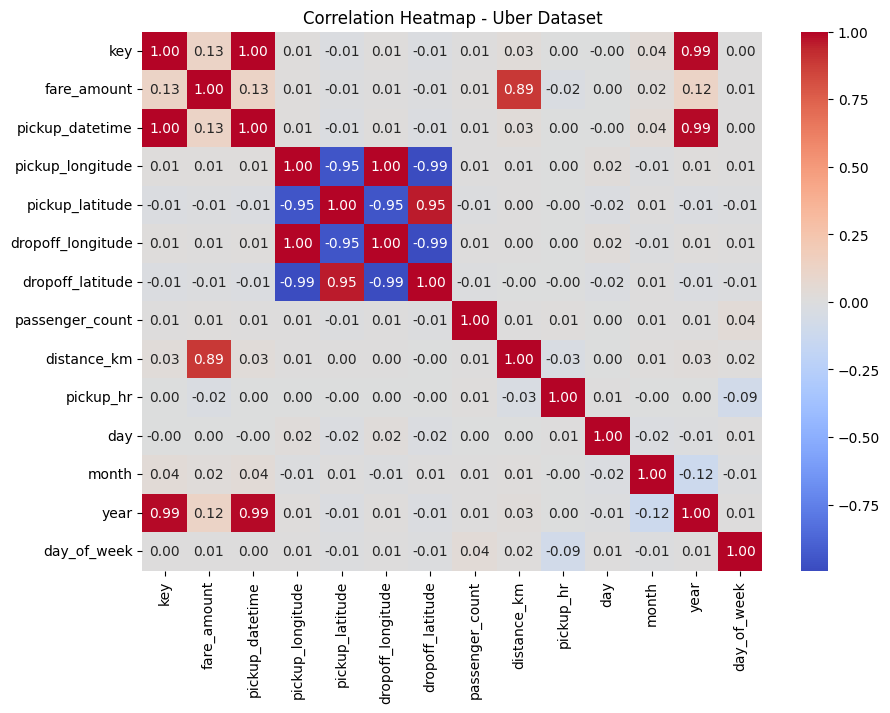

In [35]:
# 1️⃣ Copy dataframe to avoid modifying original
df_corr = df.copy()

# 2️⃣ Drop irrelevant/non-numeric identifiers
df_corr.drop(columns=["Unnamed: 0"], inplace=True)

# 3️⃣ Convert datetime-like columns to numeric timestamps
datetime_cols = ["key", "pickup_datetime"]
for col in datetime_cols:
    df_corr[col] = pd.to_datetime(df_corr[col], errors='coerce').view('int64') // 10**9  # seconds since epoch

# 4️⃣ Compute correlation matrix
corr = df_corr.corr(numeric_only=True)

# 5️⃣ Plot heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Heatmap - Uber Dataset")
plt.show()


In [37]:
x = df[["year", "distance_km"]]
y = df["fare_amount"]

In [39]:
scaler=StandardScaler()

In [41]:
x=scaler.fit_transform(x)

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [45]:

model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [47]:
y_pred = model.predict(x_test)


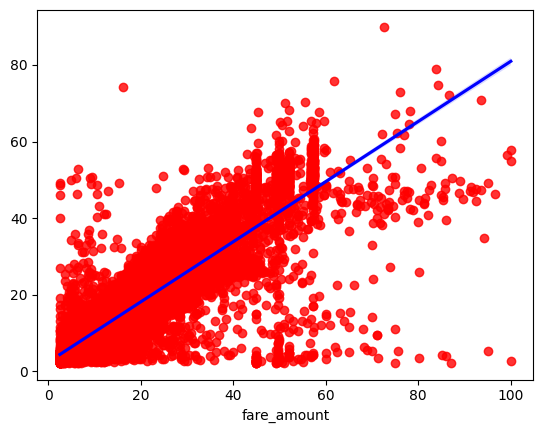

In [49]:

sns.regplot(x=y_test, y=y_pred, color="red", line_kws={"color" : "blue"})
plt.show()

In [51]:
print(f"Mean absolute error {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"Mean squared error {metrics.mean_squared_error(y_test, y_pred)}")
print(f"Root mean squared error {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")

Mean absolute error 2.24387950345949
Mean squared error 18.323819106454565
Root mean squared error 4.280633026370581


In [53]:
model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

In [54]:
y_pred = model.predict(x_test)


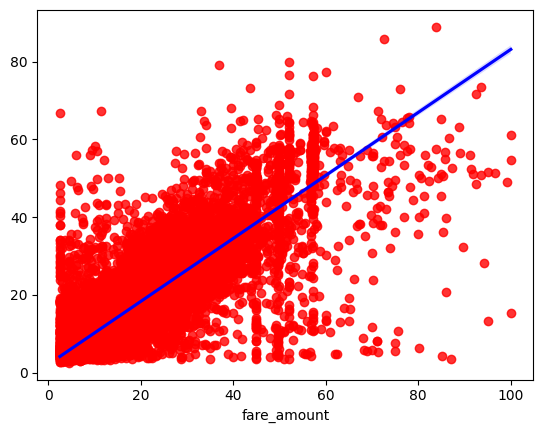

In [55]:
sns.regplot(x=y_test, y=y_pred, color="red", line_kws={"color" : "blue"})
plt.show()

In [56]:

print(f"Mean absolute error {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"Mean squared error {metrics.mean_squared_error(y_test, y_pred)}")
print(f"Root mean squared error {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")

Mean absolute error 2.4988838396925326
Mean squared error 21.320914166806062
Root mean squared error 4.617457543584571


In [ ]:
s